# Python para análise exemplificando setor de Varejo


### Conjunto de Dados

O conjunto de dados utilizado nesta análise exploratória é um conjunto fictício que simula vendas no varejo. Este dataset foi especialmente criado para servir como base para práticas de análise de dados, contendo variáveis que são comuns no contexto de vendas varejistas.

### Objetivo da Análise
O principal objetivo desta análise é treinar e aplicar técnicas de Análise Exploratória de Dados (EDA) utilizando a linguagem Python. Através desta análise, buscamos compreender melhor as características do nosso conjunto de dados, identificar padrões, tendências e possíveis anomalias.


## Carregando os Dados

In [126]:
import pandas as pd

dados = pd.read_csv('dados/dataset.csv', sep=',')

In [127]:
dados.sample(5) # Amostra dos dados

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
4304,CA-2017-161095,28/06/2017,CS-12250,Corporate,Brasil,Vila Nova do Sul,Rio Grande do Sul,OFF-BI-10001524,Papelaria,Binders,33.568
8414,CA-2018-118199,09/05/2018,LB-16795,Home Office,Brasil,Limoeiro do Ajuru,Pará,OFF-ST-10000604,Papelaria,Storage,104.280
926,CA-2015-132962,13/09/2015,JM-15535,Consumidor,Brasil,Campos Novos,Santa Catarina,TEC-AC-10004353,Aparelhos,Accessories,252.000
4288,CA-2018-102407,09/12/2018,AT-10435,Home Office,Brasil,Maturéia,Paraíba,FUR-TA-10003748,Decoração,Tables,896.328
8815,CA-2016-144274,23/11/2016,PW-19240,Consumidor,Brasil,Campina do Monte Alegre,São Paulo,OFF-PA-10003441,Papelaria,Paper,38.880


In [128]:
# Verificando o tipo de dado de cada coluna
dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

## Análise Exploratória

In [129]:
# Resumo estatístico da coluna com o valor de venda
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [130]:
# Verificando se há registros duplicados
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [131]:
# Verificando de há valores ausentes
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Qual Cidade com Maior Valor de Venda de Produtos da Categoria Escritório?
Resposta:
A cidade com maior valor de venda é 'Arraias', com total de R$ 9895 

In [132]:
cidades_suplies = dados[dados['Categoria'] == 'Papelaria']
cidades_suplies = cidades_suplies.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending = False)
print(cidades_suplies.head(1))

Cidade
Arraias    9895.036
Name: Valor_Venda, dtype: float64


## Qual o Total de Vendas Por Data do Pedido?

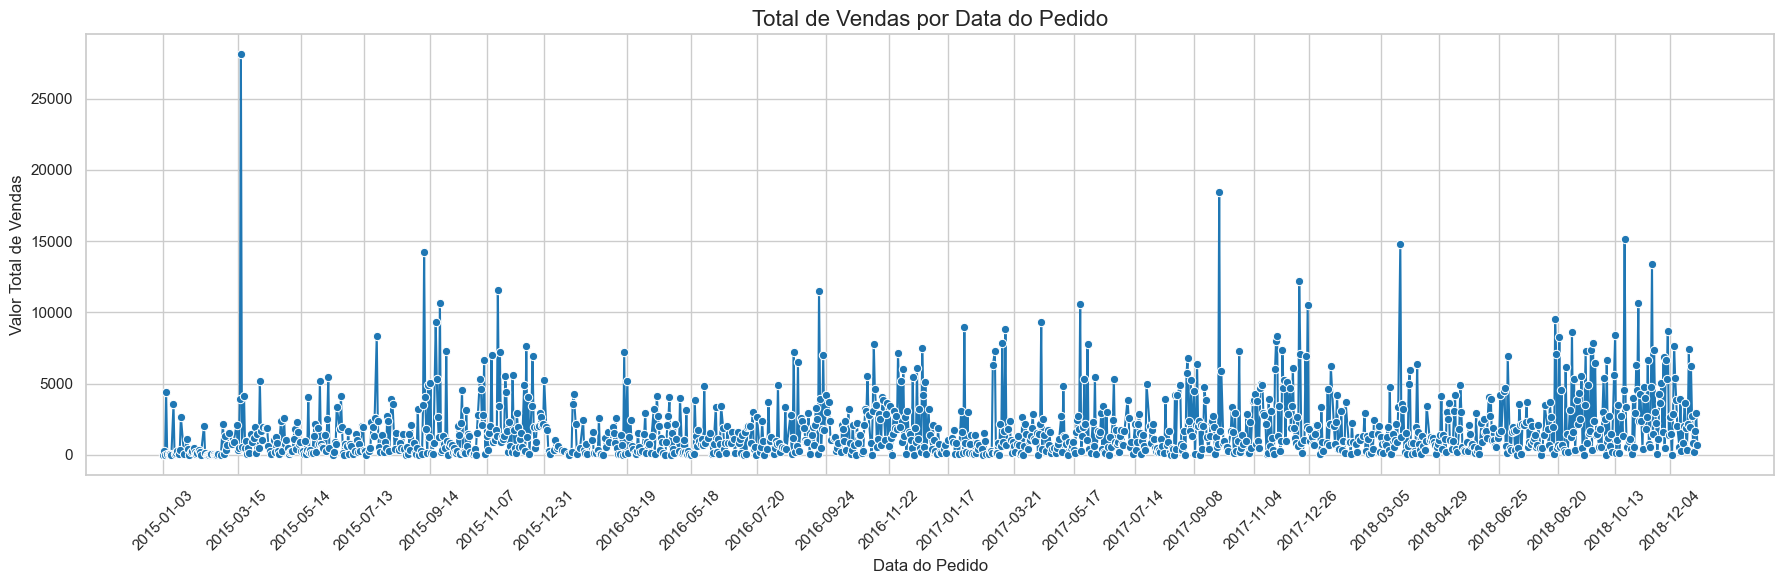

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns


# Configuração estética do seaborn
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Garantir que a coluna de datas esteja no formato datetime
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'])

# Agrupando e somando o total de vendas por data
total_vendas_por_data = dados.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

# Ordenar por data em ordem crescente
total_vendas_por_data = total_vendas_por_data.sort_values('Data_Pedido')

# Gráfico de linha
plt.figure(figsize=(18,6))
sns.lineplot(data=total_vendas_por_data, x='Data_Pedido', y='Valor_Venda', marker='o')

plt.title('Total de Vendas por Data do Pedido', fontsize=16)
plt.xlabel('Data do Pedido', fontsize=12)
plt.ylabel('Valor Total de Vendas', fontsize=12)

# Mostrar apenas algumas datas no eixo x
plt.xticks(total_vendas_por_data['Data_Pedido'][::50], rotation=45)
plt.tight_layout()
plt.show()


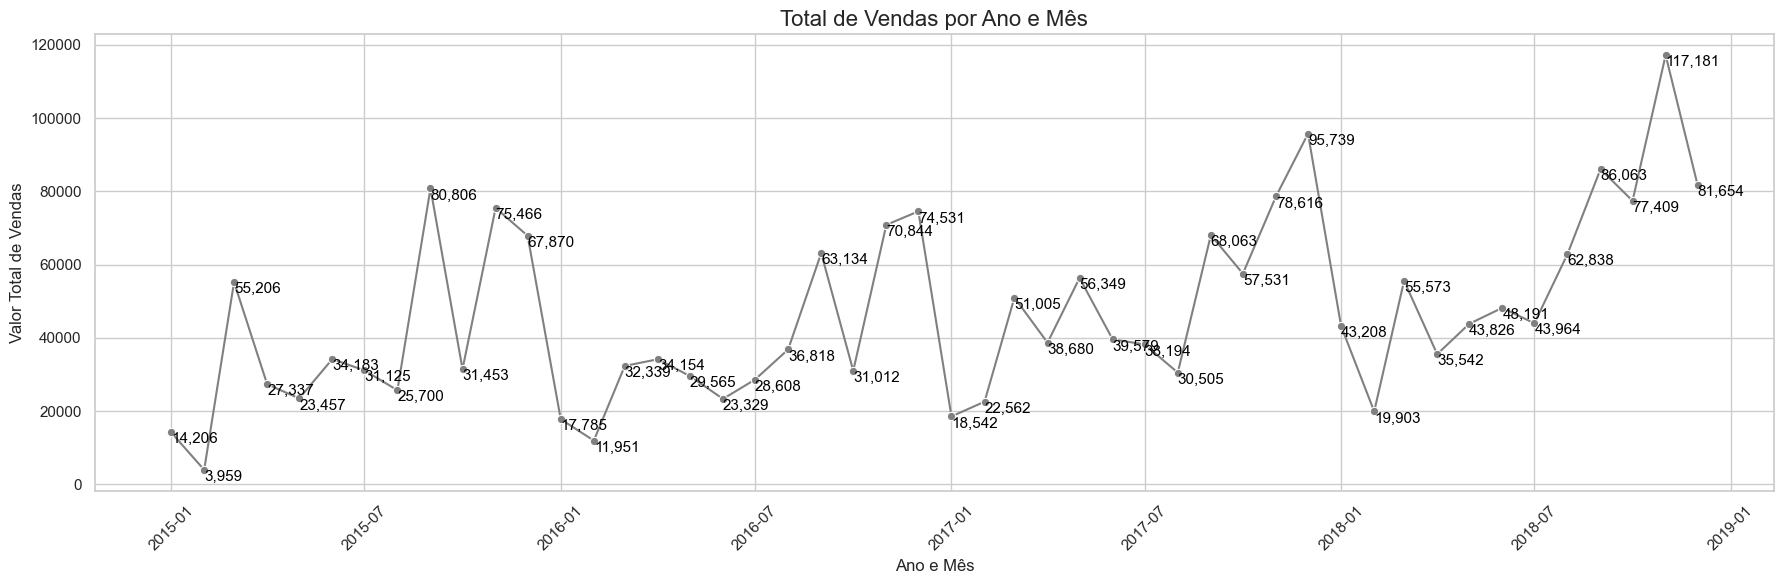

In [151]:
# Convertendo para datetime corretamente
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst=True)

# Criando coluna AnoMes
dados['AnoMes'] = dados['Data_Pedido'].dt.to_period('M')

# Agrupando por Ano e Mês
vendas_por_ano_mes = dados.groupby('AnoMes')['Valor_Venda'].sum().reset_index()
vendas_por_ano_mes['AnoMes'] = vendas_por_ano_mes['AnoMes'].dt.to_timestamp()

# Ordenar por data em ordem crescente
vendas_por_ano_mes = vendas_por_ano_mes.sort_values('AnoMes')

# Gráfico
plt.figure(figsize=(18,6))
sns.lineplot(data=vendas_por_ano_mes, x='AnoMes', y='Valor_Venda', marker='o', color='gray')

# Adicionar labels em cada ponto
for x, y in zip(vendas_por_ano_mes['AnoMes'], vendas_por_ano_mes['Valor_Venda']):
    plt.text(x, y, f'{y:,.0f}', ha='left', va='top', fontsize=11, color='black')

plt.title('Total de Vendas por Ano e Mês', fontsize=16)
plt.xlabel('Ano e Mês', fontsize=12)
plt.ylabel('Valor Total de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

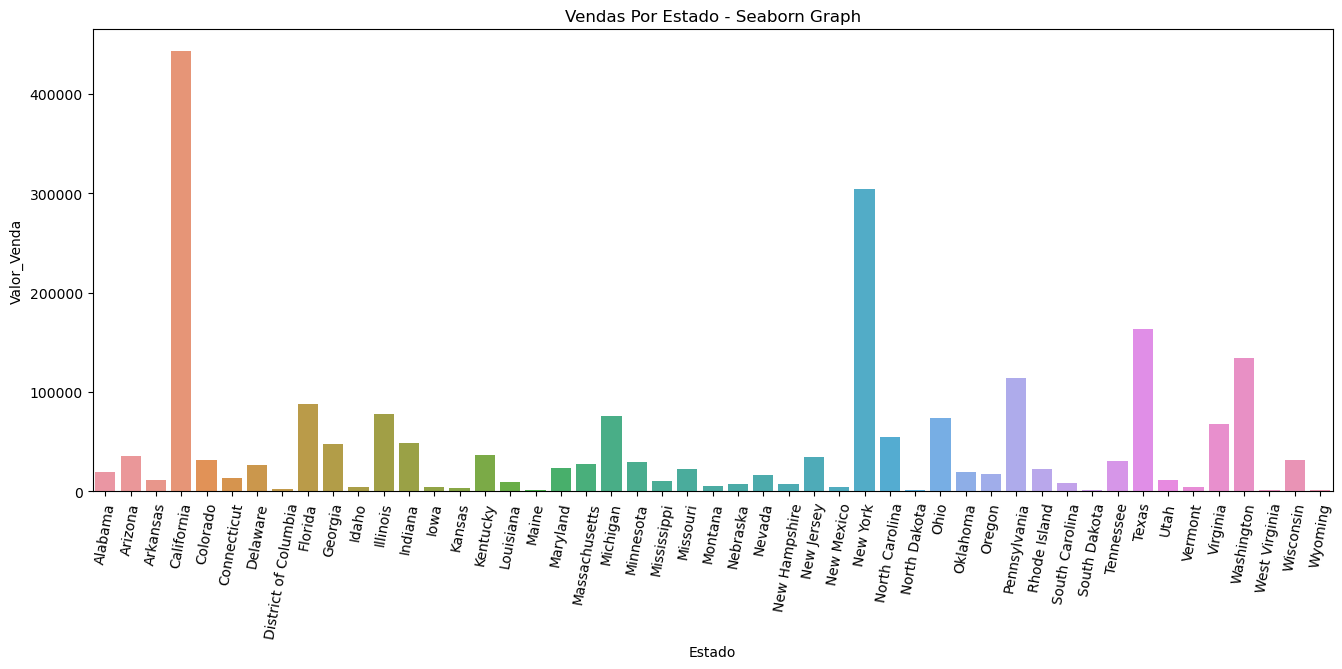

In [15]:
vendas_por_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = vendas_por_estado,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas Por Estado - Seaborn Graph')
plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

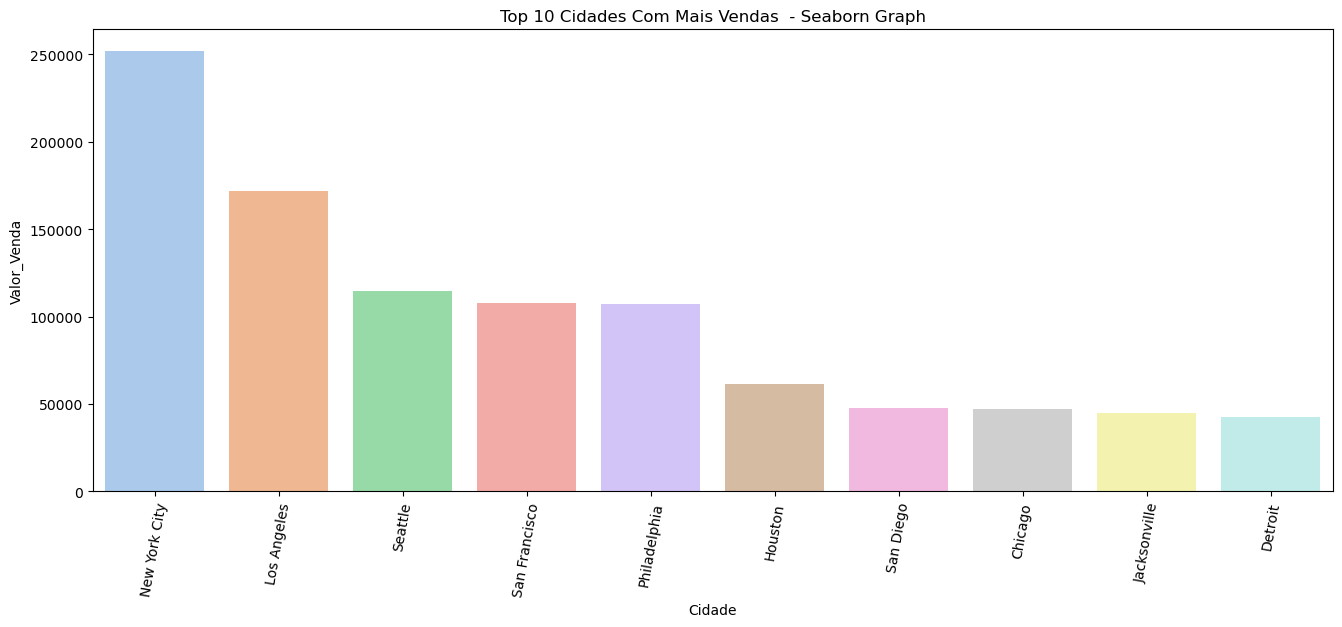

In [16]:
top10_cidades_vendas = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index()
top10_cidades_vendas = top10_cidades_vendas.sort_values('Valor_Venda', ascending=False).head(10)

plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = top10_cidades_vendas,
           y = 'Valor_Venda',
           x = 'Cidade').set(title = 'Top 10 Cidades Com Mais Vendas  - Seaborn Graph')
plt.xticks(rotation=80)
plt.show()


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

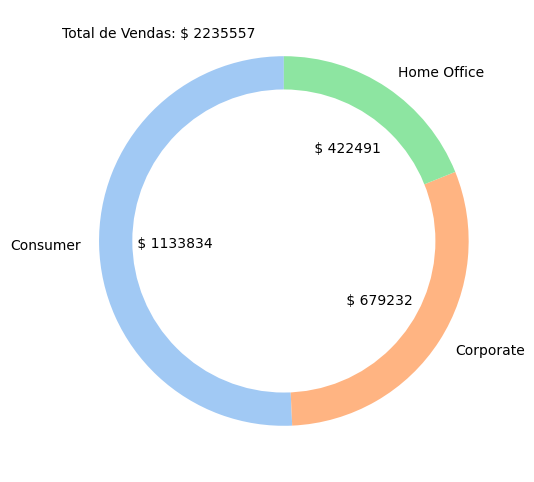

In [17]:
# Agrupando
segmentos_vendas = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()
segmentos_vendas = segmentos_vendas.sort_values('Valor_Venda', ascending=False)

# Formatando os valores
def format_values(values):
    def porcents(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return porcents

# Gráfico
plt.figure(figsize = (16, 6))
plt.pie(
        segmentos_vendas['Valor_Venda'],
        labels = segmentos_vendas['Segmento'],
        autopct = format_values(segmentos_vendas['Valor_Venda']),
        startangle = 90)

# Donut
donut = plt.Circle((0,0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut)

# Labels
plt.annotate(text='Total de Vendas: '+'$ '+str(int(sum(segmentos_vendas['Valor_Venda']))), xy=(-1.2, 1.1))
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [18]:
# Vemos que a coluna Data_Pedido não informa apenas o Ano
df_dsa['Data_Pedido'].head(3)

0    08/11/2017
1    08/11/2017
2    12/06/2017
Name: Data_Pedido, dtype: object

In [19]:
# Vamos criar uma colunas apenas para informar o ano do pedido
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True)
df_dsa['Ano_Pedido'] = df_dsa['Data_Pedido'].dt.year
df_dsa['Ano_Pedido'].head(3)

0    2017
1    2017
2    2017
Name: Ano_Pedido, dtype: int64

In [20]:
# Agora podemos agrupar considerando somente o ano e o segmento
vendas_ano_segmento = df_dsa.groupby(['Ano_Pedido', 'Segmento'])['Valor_Venda'].sum()
vendas_ano_segmento

Ano_Pedido  Segmento   
2015        Consumer       256719.9166
            Corporate      125819.5957
            Home Office     88229.0878
2016        Consumer       265295.2593
            Corporate      114643.1229
            Home Office     74134.1332
2017        Consumer       288459.5572
            Corporate      203266.7398
            Home Office    103639.6270
2018        Consumer       323359.6019
            Corporate      235502.7284
            Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [21]:
# Unsando numpy where (condition, value if true, value if false), criamos a nova coluna
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 100, 0.15, 0.10)
# Agora apenas contamos as categorias
df_dsa['Desconto'].value_counts()

0.10    6049
0.15    3651
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [22]:
# Valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])
# Vendas antes do desconto
media_vendas_antes_desconto = df_dsa[df_dsa['Desconto'] == 0.15]['Valor_Venda']
media_vendas_depois_desconto = df_dsa[df_dsa['Desconto'] == 0.15]['Valor_Venda_Desconto']
# Agora apenas retornamos os valores médios
print('Média das vendas ANTES do desconto de 15%:  $',round(media_vendas_antes_desconto.mean(),2))
print('Média das vendas DEPOIS do desconto de 15%: $',round(media_vendas_depois_desconto.mean(),2))

Média das vendas ANTES do desconto de 15%:  $ 560.27
Média das vendas DEPOIS do desconto de 15%: $ 476.23


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

                                          sum        mean  median
Ano_Pedido Mes_Pedido Segmento                                   
2015       1          Consumer      6896.6290  146.736787  36.440
                      Corporate     1701.5280  130.886769  51.940
                      Home Office   5607.5500  329.855882  62.820
           2          Consumer      3167.8540  117.327926  22.776
                      Corporate      623.1180   69.235333  62.310
...                                       ...         ...     ...
2018       11         Corporate    44357.9862  341.215278  79.530
                      Home Office  24009.3840  247.519423  56.560
           12         Consumer     48107.4558  183.616244  52.533
                      Corporate    20524.4320  153.167403  46.460
                      Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

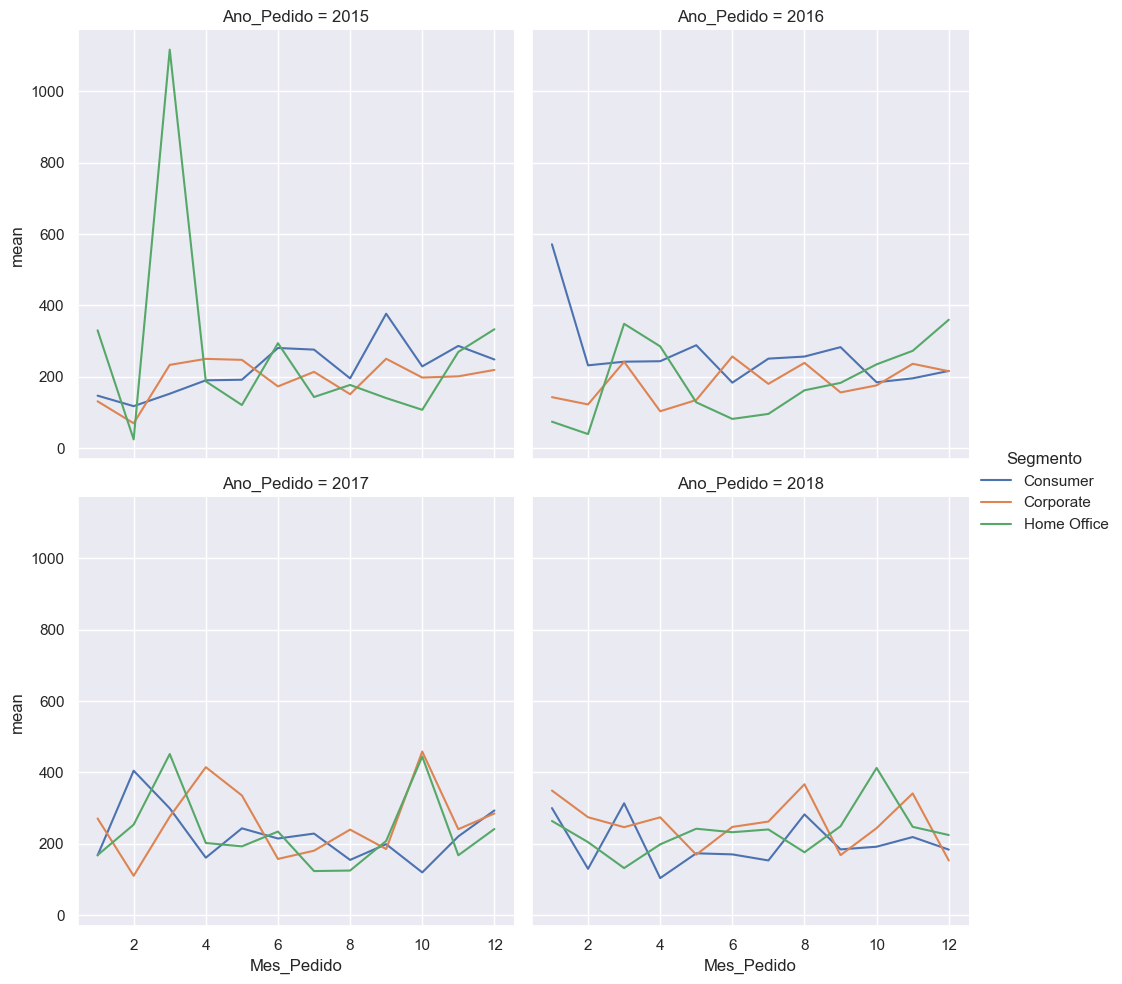

In [23]:
# Obtemos o mês para cada pedido
df_dsa['Mes_Pedido'] = df_dsa['Data_Pedido'].dt.month
# Agrupamos por ano, mês e segmento e podemos usar o método agg para obter estatísticas
stats_ano_mes_segmento = df_dsa.groupby(['Ano_Pedido', 'Mes_Pedido', 'Segmento'])['Valor_Venda']
stats_ano_mes_segmento = stats_ano_mes_segmento.agg([np.sum, np.mean, np.median])
print(stats_ano_mes_segmento)

# Obtendo as partições
anos = stats_ano_mes_segmento.index.get_level_values(0)
meses = stats_ano_mes_segmento.index.get_level_values(1)
segmentos = stats_ano_mes_segmento.index.get_level_values(2)

# Gráfico
plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(
    kind='line', data=stats_ano_mes_segmento, 
    y='mean', x=meses,
    hue=segmentos,col=anos, col_wrap=2)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [24]:
# Agrupamento por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
categorias = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True)
categorias = categorias.sort_values('Valor_Venda', ascending = False).head(12)
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
categorias = categorias[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

# Criamos outro dataframe somente com os totais por categoria
categorias_cat = categorias.groupby('Categoria').sum(numeric_only = True).reset_index()


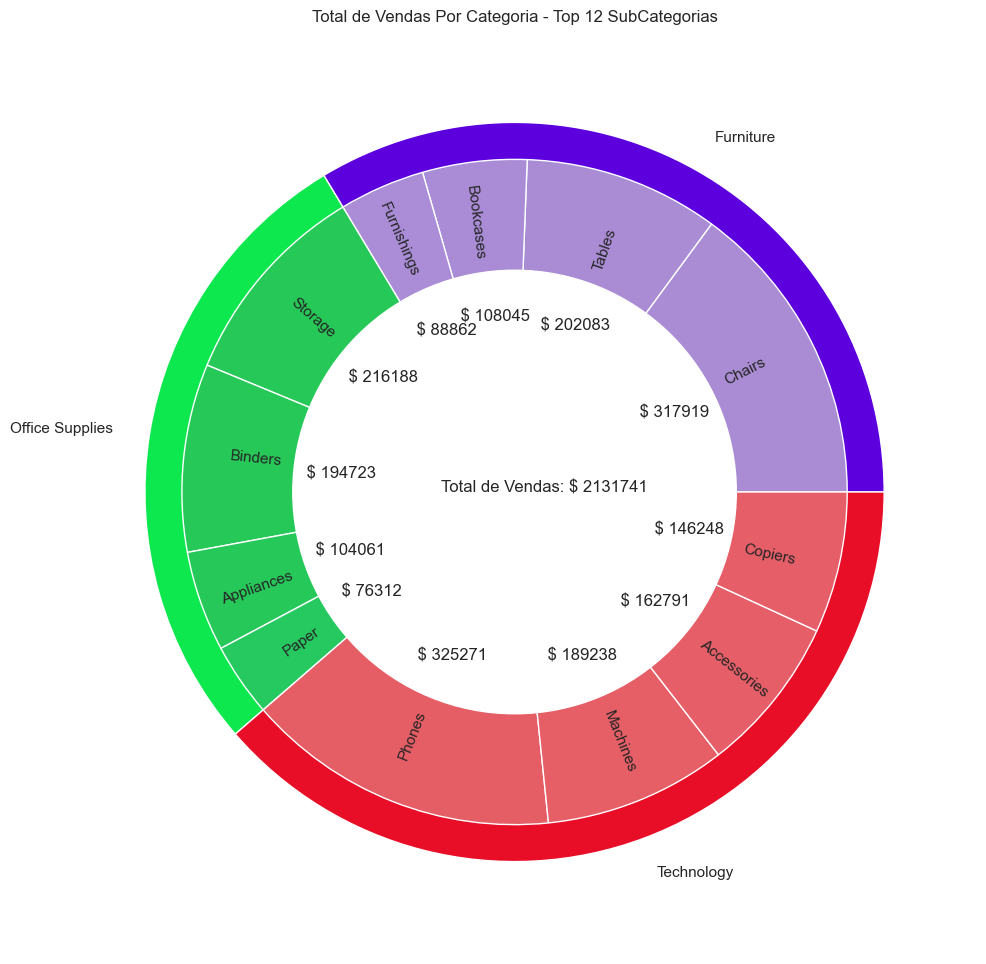

In [25]:
# Cores
cores_categorias = ['#5d00de','#0ee84f','#e80e27']
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(categorias_cat['Valor_Venda'], 
            radius = 1,
            labels = categorias_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(categorias['Valor_Venda'],
            radius = 0.9,
            labels = categorias['SubCategoria'],
            autopct = format_values(categorias['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(categorias['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria - Top 12 SubCategorias')
plt.show()